# Lesson 1

In [29]:
from fastbook import *

In [30]:
import numpy

In [31]:
urls=search_images_ddg('mouse image',max_images=1)
urls

(#1) ['https://www.skedaddlewildlife.com/wp-content/uploads/2019/11/Feature-Image-Mice-Facts.jpg']

In [32]:
len(urls)

1

In [33]:
urls[0]

'https://www.skedaddlewildlife.com/wp-content/uploads/2019/11/Feature-Image-Mice-Facts.jpg'

In [34]:
dest=Path('mouse.jpg')

In [35]:
dest

Path('mouse.jpg')

In [36]:
if not dest.exists():
    download_url(urls[0],dest,show_progress=True)

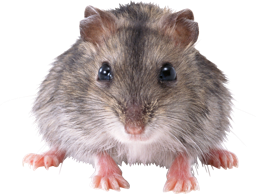

In [37]:
im=Image.open(dest)
im.to_thumb(256,256)

In [38]:
searches='mouse','snake'
path=Path('mouse_or_not')

if not path.exists():
    for o in searches:
        dest=(path/o)
        dest.mkdir(exist_ok=True,parents=True)
        results=search_images_ddg(f'{o} photo')
        download_images(dest,urls=results[:200])
        resize_images(dest,max_size=400,dest=dest)

In [39]:
failed=verify_images(get_image_files(path))

In [40]:
failed.map(Path.unlink)

(#0) []

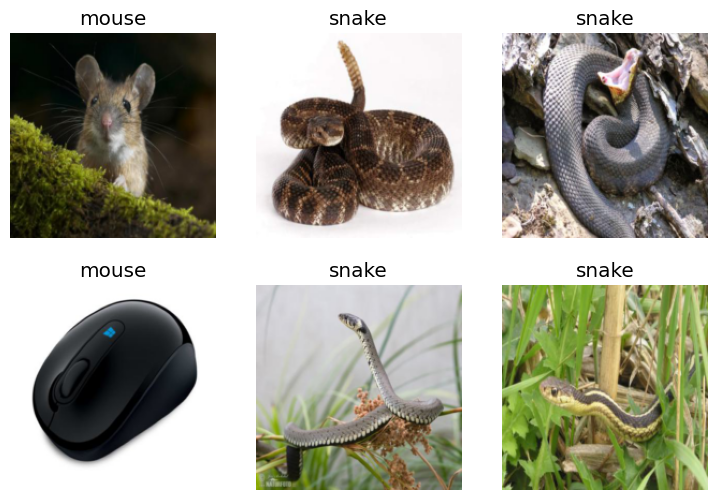

In [41]:
dls=DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192,method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

In [42]:
learn=vision_learner(dls,resnet18,metrics=error_rate)
learn.fine_tune(3)

c:\Users\Karim.Badr\Anaconda3\envs\karim\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Karim.Badr\Anaconda3\envs\karim\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,0.970674,0.285309,0.135135,00:16


epoch,train_loss,valid_loss,error_rate,time
0,0.075278,0.006650,0.000000,00:21
1,0.041512,0.003358,0.000000,00:23
2,0.027046,0.005311,0.000000,00:25


In [43]:
is_mouse,_,probs=learn.predict(PILImage.create('mouse.jpg'))
print(f'This is a: {is_mouse}.')
print(f"Probability it's a mouse: {probs[0]:.4f}")

This is a: mouse.
Probability it's a mouse: 1.0000


In [44]:
learn.predict(PILImage.create('mouse.jpg'))

('mouse', tensor(0), tensor([1.0000e+00, 1.2419e-06]))

In [45]:
url=search_images_ddg('cat image',max_images=1)
url

(#1) ['https://images.unsplash.com/photo-1529778873920-4da4926a72c2?ixlib=rb-1.2.1&w=1000&q=80']

In [46]:
dest1=Path('cat.jpg')

In [47]:
if not dest1.exists():
    download_url(url[0],dest1,show_progress=True)

In [48]:
is_mouse,_,probs=learn.predict(PILImage.create('cat.jpg'))
print(f'This is a: {is_mouse}.')
print(f"Probability it's a mouse: {probs[0]:.4f}")

This is a: mouse.
Probability it's a mouse: 0.9715
